In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8c509b54d6d846f5be5c441e07a53f99 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_2j600Uw7TQ1ZqJbjzAlhit4BMCITTp0qteScaXFp4Y0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_8c509b54d6d846f5be5c441e07a53f99.get_object(Bucket='applyingmachinelearningtofinancia-donotdelete-pr-wfs0v2ygcbjiqu',Key='german_credit_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#data = pd.read_csv(r'C:\Users\HP\Downloads\Telegram Desktop\german_credit_data.csv')

In [3]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
data.shape

(1000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   818 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [6]:
cols = ["Saving accounts", "Checking account"]
data[cols]=data[cols].fillna(data.mode().iloc[0])

In [7]:
data.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,786,668,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


<AxesSubplot:xlabel='Age', ylabel='Count'>

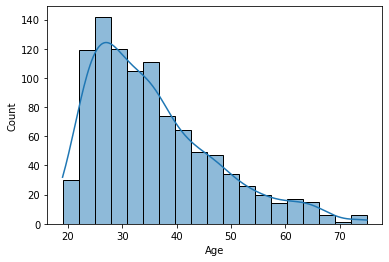

In [8]:
sb.histplot(data['Age'],kde=True)

<AxesSubplot:xlabel='Credit amount', ylabel='Count'>

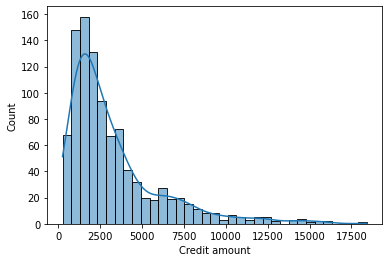

In [9]:
sb.histplot(data['Credit amount'],kde=True)

<AxesSubplot:xlabel='Risk', ylabel='count'>

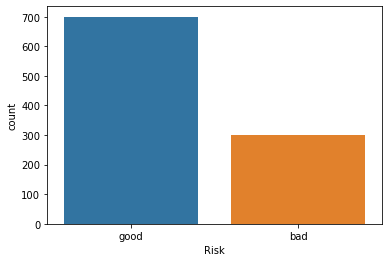

In [10]:
sb.countplot(x=data['Risk'])

In [11]:
data['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [43]:
X= data.drop(['Risk'],axis=1)
y=data['Risk']

In [13]:
obj_list = list(X.select_dtypes(include=['object']).columns)
obj_list

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [14]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [15]:
ct =  ColumnTransformer([('oe',OrdinalEncoder(),obj_list)],remainder='passthrough')

In [16]:
X=ct.fit_transform(X)

In [17]:
X

array([[1.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 1.169e+03,
        6.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 5.951e+03,
        4.800e+01],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+00, 2.096e+03,
        1.200e+01],
       ...,
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 8.040e+02,
        1.200e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 1.845e+03,
        4.500e+01],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 2.000e+00, 4.576e+03,
        4.500e+01]])

In [18]:
le=LabelEncoder()

In [19]:
y=le.fit_transform(y)

In [20]:
y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2,random_state=10)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 9), (200, 9), (800,), (200,))

In [23]:
X_train[0]

array([   0.,    2.,    0.,    0.,    3.,   23.,    2., 1200.,   12.])

In [24]:
!pip install ibm_watson_machine_learning

In [25]:
X_train[0]

array([   0.,    2.,    0.,    0.,    3.,   23.,    2., 1200.,   12.])

In [26]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
sm = SMOTE(random_state = 10)
X1_res, y1_res = sm.fit_resample(X_train,y_train)

In [29]:
X1_res = np.array(X1_res)
y1_res = np.array(y1_res)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X1_res,y1_res,test_size=0.2, random_state=10)

In [31]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((896, 9), (224, 9), (896,), (224,))

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
#Creating a dictionary of all models
model_dict = {}

model_dict['Logistic regression']= LogisticRegression(solver='liblinear',random_state=10)
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=10)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=10)

In [34]:
#function to print accuracy of all models
def model_test(X_train, X_test, y_train, y_test,model,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test,y_pred)
    print('======================================{}======================================='.format(model_name))
    print('Score is : {}'.format(accuracy))
    
    print()

In [35]:
for model_name,model in model_dict.items():
    model_test(X_train, X_val, y_train, y_val, model, model_name)

======================================Logistic regression=======================================
Score is : 0.6160714285714286

======================================Decision Tree Classifier=======================================
Score is : 0.7053571428571429

======================================Random Forest Classifier=======================================
Score is : 0.7857142857142857



In [36]:
for model_name, model in model_dict.items():
    p = model.predict(X_test)
    print('Testing accuracy of ',model_name,'=',accuracy_score(y_test,p))

Testing accuracy of  Logistic regression = 0.595
Testing accuracy of  Decision Tree Classifier = 0.61
Testing accuracy of  Random Forest Classifier = 0.655


In [37]:
rfc=RandomForestClassifier(random_state=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [38]:
pred_val=rfc.predict(X_val)
pred_test=rfc.predict(X_test)


In [39]:
cm_val = confusion_matrix(y_val,pred_val)
cm_val

array([[85, 29],
       [19, 91]])

In [40]:
cm_test=confusion_matrix(y_test,pred_test)
cm_test

array([[ 19,  41],
       [ 28, 112]])

Text(33.0, 0.5, 'Actual')

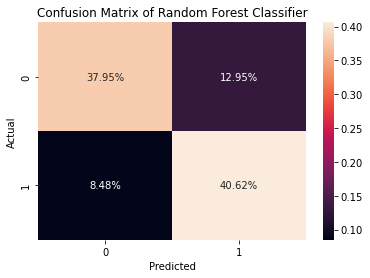

In [41]:
#Plotting confusion matrix
cf_matrix = confusion_matrix(y_val, pred_val)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [44]:
cols=list(X.columns)

In [45]:
d=[[67,'male',2,'own','little','little',1169,6,'radio/TV']]
d1=[[22,'female',2,'own','little','moderate',5951,48,'radio/TV']]
d=pd.DataFrame(d,columns=cols)
d.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV


In [46]:
pred=rfc.predict(ct.transform(d))
pred

array([1])

In [47]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
           "url":"https://us-south.ml.cloud.ibm.com",
          "apikey":"kMD7DUJcjm7ozDYxt2XipzGrx_pVecZad14qp_LdJXqt"
                  }
client = APIClient(wml_credentials)

In [48]:
def guid_from_space_name(client, space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item ['entity']['name'] == space_name)['metadata']['id'])

In [49]:
space_uid = guid_from_space_name(client,"models")
print("Space UID ="+space_uid)

Space UID =7001b10d-4df4-403e-85b9-0adc1a0ef68d


In [50]:
client.set.default_space(space_uid)

'SUCCESS'

In [51]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [52]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [53]:
model_details = client.repository.store_model(model = rfc,meta_props ={
    client.repository.ModelMetaNames.NAME:"Risk_Management",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                            )
model_id =client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1452: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [54]:
model_id

'f45b6481-eac6-407c-9a9e-c3a39b1edaa0'